## Preparación de los datos

Para la empresa de telecomunicaciones `Megaline` se debe identificar cual de sus dos tarífas de prepago son las que generan mayores ingresos con la intención de ajustar los presupuestos de publicidad. Las reglas que maneja `Megaline` explica que los `segundos` son redondeados a `minutos` y los `megabytes` a `gigabytes`, para el caso de las `llamadas`, cada `llamada` se redondea, incluso si esta tuvo una duración de un segundo, se contará como un minuto; respecto al `tráfico web` la sesiones web individuales no se redondean, en vez de esto el total del mes se redondea hacia arriba, es decir, si alguien usa 1025 megabytes, se le cobrarán 2 gigabytes. 

La descripción de las tarifas es la siguiente:

**Surf**:
- Pago mensual: 20
- 500 minutos al mes, 50 SMS y 15 GB de datos
- Si se exceden los límites del paquete:
    - 1 minuto: 3 centavos
    - 1 SMS: 3 centavos
    - 1 GB de datos: 10

**Ultimate**
- Pago mensual: 70
- 3000 minutos al mes, 1000 SMS y 30 GB de datos
- Si se exceden los límites del paquete:
    - 1 minuto: 1 centavos
    - 1 SMS: 1 centavos
    - 1 GB de datos: 7

**Objetivo:** Validar que plan genera más ingresos para la compañia `Megaline` con la intención de ajustar el siguiente presupuesto y verificar si hay alguna diferencia entre los ingresos de las regiones de `Nueva York` y `Nueva Jersey` con respecto a otras regiones.


# Tabla de contenidos

**1.- Preparación de los datos**: Estudio de los datos para validar que se encuentren en óptimas condiciones para el trabajo.

**2.- Análisis estadístico**: Calculo de promedios, varianzas, desviaciones estandar y presentación de histogramas, así también presentación de la cantidad de usuarios que sobrepasan los límites del plan contratado y sus servicios.

**3.- Prueba de hipótesis**: Pruebas de hipótesis para validación de lo encontrado en el `análisis estadístico`.

**4.- Conclusiones**


### Apertura de archivos y estudio de la información

In [1]:
# Importando librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import levene
import random

In [2]:
# Importando información
df_megaline_calls = pd.read_csv('datasets/megaline_calls.csv')
df_megaline_internet = pd.read_csv('datasets/megaline_internet.csv')
df_megaline_messages = pd.read_csv('datasets/megaline_messages.csv')
df_megaline_plans = pd.read_csv('datasets/megaline_plans.csv')
df_megaline_users = pd.read_csv('datasets/megaline_users.csv')


Se analizará la información contenida en cada uno de los df con la intención de asegurarnos que proporcione la mejor calidad posible a nuestro análisis.

Comenzaremos analizando el dataframe `df_megaline_users` pues las tarifas son asignadas a los usuarios.

### Trabajando con "df_megaline_users"

In [3]:
# Obteniendo información de "df_megaline_users"
df_megaline_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Como se puede observar, la tabla nos proporciona la información de `500` usuarios y tiene la siguiente descripción:

- `user_id`: Es el identificador único de usuario y tiene un tipo de dato `int`.
- `first_name`: Nombre del usuario y tipo de dato `object = str`.
- `last_name`: Apellido del usuario y tipo de dato `object = str`.
- `age`: Edad del usuario en años y tipo de dato `int`.
- `city`: Ciudad de residencia del usuario y tipo de dato `object = str`.
- `reg_date`: Fecha de suscripción y tipo de dato `object = str` y debería ser `datetime`.
- `plan`: Nombre de la tarifa y tipo de dato `object = str`.
- `churn_date`: La fecha en que el usuario dejo de usar el servicio, si esta ausente significa que el servicio sigue vigente.

Visualizaremos una pequeña fracción de los datos para familiarizarnos con su estructura en el tipo de dato y procederemos con el cambio de tipo de dato de la columna `reg_date` y `churn_date` respectivamente.

In [4]:
# Visualizando una porción de la tabla "df_megaline_users"
df_megaline_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [5]:
# Corrigiendo el tipo de dato para "reg_date" y "churn_date"
df_megaline_users['reg_date'] = pd.to_datetime(df_megaline_users['reg_date'],format="%Y-%m-%d")
df_megaline_users['churn_date'] = pd.to_datetime(df_megaline_users['churn_date'],format="%Y-%m-%d")
df_megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Ahora comenzaremos a verificar duplicidad de datos, etc. con la intención de dejar el set de datos lo suficientemente limpio y listo para comenzar a trabajar.

In [6]:
# Verificando duplicidad de datos de manera general
df_megaline_users.duplicated().sum()

0

In [7]:
# Verificando duplicidad de datos omitiendo las columnas "plan", "reg_date" y "churn_date" para validar registros duplicados con fechas distintas, etc.
df_megaline_users.loc[:,['user_id','first_name','last_name','age','city']].duplicated().sum()

0

Con los resultados anteriores, podemos concluir que `df_megaline_users` cuenta con los tipos de datos correctos, no hay duplicidad de registros y respecto a la columna `churn_date`se decidió no modificar sus valores ausentes puesto que de igual forma aportan información. Continuaremos trabajando ahora con `df_megaline_plans` pues también debemos partir de conocer que información nos ofrecen los planes.

### Trabajando con "df_megaline_plans"

In [8]:
# Obteniendo información de "df_megaline_plans"
df_megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


Esta tabla nos proporciona información de los planes que ofrece `Megaline` que son 2 y la información que nos proporciona es la siguiente:

- `messages_included`: SMS incluidos al mes de tipo `int`.
- `mb_per_month_included`: Datos incluidos al mes en megabytes del tipo `int`.
- `minutes_included`: Minutos incluidos al mes del tipo `int`.
- `usd_monthly_pay`: Pago en dolares mensual del tipo `int`.
- `usd_per_gb`: Precio por gigabyte de los datos extra tras exceder los límites del paquete (1GB = 1024 megabytes) del tipo `int`.
- `usd_per_message`: Precio por SMS tras exceder los límites del paquete del tipo `float`.
- `usd_per_minute`: Precio por minuto tras exceder los límites del paquete del tipo `float`.
- `plan_name`: Nombre de la tarifa del tipo `object = str`.

Visualizaremos la tabla completa para familiarizarnos con ella.


In [9]:
# Visualizando "df_megaline_plans"
df_megaline_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Comenzaremos a trabajar con el resto de tablas que son `df_megaline_calls`, `df_megaline_internet` y `df_megaline_messages` que son los registros realizaros en el año 2018 de 500 usuarios para poder analizar su consumo dependiendo del plan con el que cuenten.

### Trabajando con "df_megaline_calls"

In [10]:
# Obteniendo información de la tabla "df_megaline_calls"
df_megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


Esta tabla nos explica el consumo de llamadas realizado por los usuarios por fecha, esta cuenta con distintas columnas que son:
- `id`: Identificador único de llamada del tipo `object = str`.
- `user_id`: Identificador del usuario que realiza la llamada del tipo `int`.
- `call_date`: Fecha de la llamada del tipo `object = str` lo cual debería ser `datetime`.
- `duration`: Duración de la llamada en minutos del tipo `float` que debería ser `int`.

Como podemos concluir, hay dos columnas que tiene el tipo de dato incorrecto que son `call_date` y `duration`; para el caso de `call_date` se modificara el tipo de dato sin modificar los valores de la columna, sin embargo, para el caso de `duration` se debe aplicar la regla establecida por la empresa que dice que la duración de la llamada se redondeara al entero superior independientemente si la duración fue de 1 segundo, por ende, se aplicarán estos cambios.

In [11]:
# Trabajando con la columna "call_date" de "df_megaline_calls"
df_megaline_calls['call_date'] = pd.to_datetime(df_megaline_calls['call_date'],format="%Y-%m-%d")
df_megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [12]:
# Imprimiendo la tabla para validar cambios
df_megaline_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [13]:
# Trabjando con la columna "duration" de "df_megaline_calls"
df_megaline_calls['duration'] = np.ceil(df_megaline_calls['duration'])
df_megaline_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0
137731,1499_200,1499,2018-10-20,11.0
137732,1499_201,1499,2018-09-21,9.0
137733,1499_202,1499,2018-10-10,1.0


Continuaremos analizando la información contenida en nuestro DataFrame verficando si este cuenta con datos duplicados, o algún patrón o registro que deba ser preprocesado.

In [14]:
# Verificando duplicidad de datos
df_megaline_calls.duplicated().sum()

0

En esta tabla no nos encontramos con registros duplicados. Para la tabla `df_megaline_messages` y `df_megaline_internet` continuaremos con su análizis.

### Trabajando con "df_megaline_messages"

In [15]:
# Obteniendo información de "df_megaline_messages"
df_megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


Esta tabla cuenta con `76051` mensajes registrados y las columnas que tiene son: 
- `id`: Identificador único del mensaje del tipo `object = str`.
- `user_id`: Identificador del usuario que manda el SMS tel tipo `int`.
- `message_date`: Fecha del SMS del tipo `object = str` que debería ser `datetime`.

Trabajaremos con la columna `message_date` para asignarle el tipo de dato correcto.

In [16]:
# Verificando los datos de "df_megaline_messages"
df_megaline_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [17]:
# Trabajando con la columna "message_date"
df_megaline_messages['message_date'] = pd.to_datetime(df_megaline_messages['message_date'],format="%Y-%m-%d")
df_megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


Profundizaremos en los datos para validar que se encuentren en la mejor condición posible.

In [18]:
# Verificando duplicidad de datos
df_megaline_messages.duplicated().sum()

0

### Trabajando con "df_megaline_internet"

In [19]:
# Obteniendo información de "df_megaline_internet"
df_megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


De acuerdo con la información en esta tabla tenemos lo siguiente:
- `id`: Identificador único de la sesión del tipo `object = str`.
- `user_id`: Identificador del usuario del tipo `int`.
- `session_date`: Fecha de la sesión web del tipo `object = str` que debería ser del tipo `datetime`.
- `mb_used`: El volumen de datos gastados durante la sesión en megabytes del tipo `float`.

De esta información podemos destacar una cosa, si bien una de las reglas de la empresa menciona que el consumo se debe ajustar a finales de mes de acuerdo con lo consumido durante el mismo, de momento no vamos a trabajar con la columna `mb_used` esto es porque, para hacer cumplir dicha regla, los consumos descritos en esta columna deben ser sumados al mes y es aquí donde se debe hacer el redondeo.

Respecto a la columna `session_date`, esta debe ser modificada en el tipo de dato que la rige.

In [20]:
# Trabajando con la columna "session_date"
df_megaline_internet['session_date'] = pd.to_datetime(df_megaline_internet['session_date'],format="%Y-%m-%d")
df_megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [21]:
# Verificando duplicidad de datos
df_megaline_internet.duplicated().sum()

0

Hasta este punto podemos decir que las tablas tienen el tipo de dato correcto en todas sus columnas. Las reglas de `Megaline` para el caso de las llamadas en la columna `duration` han sido aplicadas considerando los siguientes casos:
- Los registros con duración de 0.0 se han ajustado a 0.
- Los registros que tienen duración entera (ejemplo 1.0, 2.0, etc) se han ajustado a su valor entero unicamente.
- Los registros que tienen un duración con decimales (segundos en dado caso) se han redondeado al valor entero superior.

Respecto a las llamadas que tienen una duración de `0` se decidió seguir trabajando con estos datos de manera intacta de momento puesto que al final no representaría sesgo al momento de generar las facturas mensuales, si se requiere alguan adaptación posteriomente, esta se hará de manera justificada.

### Generación de concentrado de información de tarifas mensuales para cada usuario

Con la intención de concentrar los datos tarifarios de cada usuario, crearemos un nuevo dataframe llamado `df_megaline_rate` con las siguientes características:
- `total_number_calls`: Número de llamadas realizadas durante el mes del tipo `int`.
- `total_minutes_calls`: Total de minutos utilizados durante el mes del tipo `int`.
- `total_number_sms`: Cantidad de mensajes enviados durante el mes del tipo `int`.
- `total_volume_internet`: Volumen de datos por mes del tipo `float`.
- `total`: Los ingresos mensuales por cada usuario, este se obtendrá restando el límite de los paquetes correspondientes del excedente de consumo del usuario multiplicandolo por la tarifa correspondiente y sumando todo al final; este dato será del tipo `float`.
- `id_total`: Identificador de tarifa por usuario.

Para poder trabajar con `id_total` primero lo trabajaremos de forma separada pero este estará compuesto por el `user_id` y el mes de facturación.

In [22]:
# Creando "id_total" en dos partes para "df_megaline_rate"
users = df_megaline_users['user_id'].unique()
months = list(range(1,13))
users_total = []
months_total = []
for user in users:
    for month in months:
        users_total.append(int(user))
        months_total.append(int(month))

df_megaline_rate = pd.DataFrame({'users_total':users_total,'months_total':months_total})

Como podemos observar en el resultado, contamos con un nuevo dataframe de tarifas con un total de `6000` registros, los cuales estan regidos por las columnas `users_total` y `months_total`.

Comenzaremos creando la columna `total_number_calls` para `df_megaline_rate`.

In [23]:
# Creando "total_number_calls" y "total_minutes_calls" para la tabla "calls"
df_megaline_calls['month'] = df_megaline_calls['call_date'].dt.month
calls = df_megaline_calls.pivot_table(index=['user_id','month'],values='duration',aggfunc=['count','sum'])
calls.columns = ['total_number_calls','total_minutes_calls']
calls


total_number_calls  total_minutes_calls
user_id month                                         
1000    12                     16                124.0
1001    8                      27                182.0
        9                      49                315.0
        10                     65                393.0
        11                     64                426.0
...                           ...                  ...
1498    12                     39                339.0
1499    9                      41                346.0
        10                     53                385.0
        11                     45                308.0
        12                     65                496.0

[2258 rows x 2 columns]

In [24]:
# Creando "total_number_sms" para la tabla "messages"
df_megaline_messages['month'] = df_megaline_messages['message_date'].dt.month
messages = df_megaline_messages.pivot_table(index=['user_id','month'],values='id',aggfunc='count')
messages.columns = ['total_number_sms']
messages

total_number_sms
user_id month                  
1000    12                   11
1001    8                    30
        9                    44
        10                   53
        11                   36
...                         ...
1496    9                    21
        10                   18
        11                   13
        12                   11
1497    12                   50

[1806 rows x 1 columns]

In [25]:
# Creando "total_volume_internet" para la tabla "internet"
df_megaline_internet['month'] = df_megaline_internet['session_date'].dt.month
internet = df_megaline_internet.pivot_table(index=['user_id','month'],values='mb_used',aggfunc='sum')
internet.columns = ['total_volume_internet']
internet


total_volume_internet
user_id month                       
1000    12                   1901.47
1001    8                    6919.15
        9                   13314.82
        10                  22330.49
        11                  18504.30
...                              ...
1498    12                  23137.69
1499    9                   12984.76
        10                  19492.43
        11                  16813.83
        12                  22059.21

[2277 rows x 1 columns]

In [26]:
# Creando "users_total", "plan" para la tabla users
users = df_megaline_users.loc[:,['user_id','plan']]

In [27]:
# Uniendo las tablas "calls", "messages", "internet" y "users" para crear "df_megaline_rate"
df_megaline_rate = calls.merge(messages,how='outer',on=['user_id','month'])
df_megaline_rate = df_megaline_rate.merge(internet,how='outer',on=['user_id','month'])
df_megaline_rate.reset_index(inplace=True)
df_megaline_rate = df_megaline_rate.merge(users,how='outer',on=['user_id'])
df_megaline_rate


,user_id,month,total_number_calls,total_minutes_calls,total_number_sms,total_volume_internet,plan
0,1000,12.0,16.0,124.0,11.0,1901.47,ultimate
1,1001,8.0,27.0,182.0,30.0,6919.15,surf
2,1001,9.0,49.0,315.0,44.0,13314.82,surf
3,1001,10.0,65.0,393.0,53.0,22330.49,surf
4,1001,11.0,64.0,426.0,36.0,18504.30,surf
...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,surf
2299,1319,NaN,NaN,NaN,NaN,NaN,surf
2300,1378,NaN,NaN,NaN,NaN,NaN,surf
2301,1463,NaN,NaN,NaN,NaN,NaN,ultimate


In [28]:
# Trabajando con los valores ausentes en "df_megaline_rate"
df_megaline_rate.fillna(0,inplace=True)
df_megaline_rate


,user_id,month,total_number_calls,total_minutes_calls,total_number_sms,total_volume_internet,plan
0,1000,12.0,16.0,124.0,11.0,1901.47,ultimate
1,1001,8.0,27.0,182.0,30.0,6919.15,surf
2,1001,9.0,49.0,315.0,44.0,13314.82,surf
3,1001,10.0,65.0,393.0,53.0,22330.49,surf
4,1001,11.0,64.0,426.0,36.0,18504.30,surf
...,...,...,...,...,...,...,...
2298,1307,0.0,0.0,0.0,0.0,0.00,surf
2299,1319,0.0,0.0,0.0,0.0,0.00,surf
2300,1378,0.0,0.0,0.0,0.0,0.00,surf
2301,1463,0.0,0.0,0.0,0.0,0.00,ultimate


In [29]:
# Obteniendo información de "df_megaline_rate"
df_megaline_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2303 non-null   int64  
 1   month                  2303 non-null   float64
 2   total_number_calls     2303 non-null   float64
 3   total_minutes_calls    2303 non-null   float64
 4   total_number_sms       2303 non-null   float64
 5   total_volume_internet  2303 non-null   float64
 6   plan                   2303 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 143.9+ KB


In [30]:
# Verificando datos dentro de "df_megaline_rate"
df_megaline_rate

,user_id,month,total_number_calls,total_minutes_calls,total_number_sms,total_volume_internet,plan
0,1000,12.0,16.0,124.0,11.0,1901.47,ultimate
1,1001,8.0,27.0,182.0,30.0,6919.15,surf
2,1001,9.0,49.0,315.0,44.0,13314.82,surf
3,1001,10.0,65.0,393.0,53.0,22330.49,surf
4,1001,11.0,64.0,426.0,36.0,18504.30,surf
...,...,...,...,...,...,...,...
2298,1307,0.0,0.0,0.0,0.0,0.00,surf
2299,1319,0.0,0.0,0.0,0.0,0.00,surf
2300,1378,0.0,0.0,0.0,0.0,0.00,surf
2301,1463,0.0,0.0,0.0,0.0,0.00,ultimate


Como podemos observar hay registros (aparentemente) que no muestran consumo mensual en alguno de los rubros, ya sea para llamadas realizadas, cantidad de minutos utilizados, mensajes enviados o el volumen de datos usados.

De momento concluiremos la construcción de `df_megaline_rate` con la última columna que hace falta que es `total`.

In [31]:
# Ajustando los valores de la columna "total_volume_internet"
df_megaline_rate['total_volume_internet'] = np.ceil(df_megaline_rate['total_volume_internet']/1024)
df_megaline_rate

,user_id,month,total_number_calls,total_minutes_calls,total_number_sms,total_volume_internet,plan
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate
1,1001,8.0,27.0,182.0,30.0,7.0,surf
2,1001,9.0,49.0,315.0,44.0,14.0,surf
3,1001,10.0,65.0,393.0,53.0,22.0,surf
4,1001,11.0,64.0,426.0,36.0,19.0,surf
...,...,...,...,...,...,...,...
2298,1307,0.0,0.0,0.0,0.0,0.0,surf
2299,1319,0.0,0.0,0.0,0.0,0.0,surf
2300,1378,0.0,0.0,0.0,0.0,0.0,surf
2301,1463,0.0,0.0,0.0,0.0,0.0,ultimate


In [32]:
# Creando "total" para "df_megaline_rate"
def total_income(row):
    number_calls = row['total_number_calls']
    minutes_calls = row['total_minutes_calls']
    number_sms = row['total_number_sms']
    total_internet = row['total_volume_internet']
    plan = row['plan']

    total = 0

    if plan == 'surf':
        total = 20
        # Correspondiente a llamadas, SMS e Internet
        if minutes_calls > 500:
            total = total + (minutes_calls - 500) * 0.03
        if number_sms > 50:
            total = total + (number_sms - 50) * 0.03
        if total_internet > 15:
            total = total + (total_internet - 15) * 10
    else:
        total = 70
        # Correspondiente a llamadas, SMS e Internet
        if minutes_calls > 3000:
            total = total + (minutes_calls - 3000) * 0.01
        if number_sms > 1000:
            total = total + (number_sms - 1000) * 0.01
        if total_internet > 30:
            total = total + (total_internet - 30) * 7
    
    return total

df_megaline_rate['total'] = df_megaline_rate.apply(total_income,axis=1)
df_megaline_rate.head()


,user_id,month,total_number_calls,total_minutes_calls,total_number_sms,total_volume_internet,plan,total
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,70.00
1,1001,8.0,27.0,182.0,30.0,7.0,surf,20.00
2,1001,9.0,49.0,315.0,44.0,14.0,surf,20.00
3,1001,10.0,65.0,393.0,53.0,22.0,surf,90.09
4,1001,11.0,64.0,426.0,36.0,19.0,surf,60.00


## Análisis estadístico

Comenzaremos nuestra análisis estadístico graficando el comportamiento de los usuarios haciendo uso de las distintas características del plan contratado, partiendo de esto se dará forma e interpretación a los datos.

### Trabajando con la columna "total_number_calls" de la tabla "df_megaline_rate"



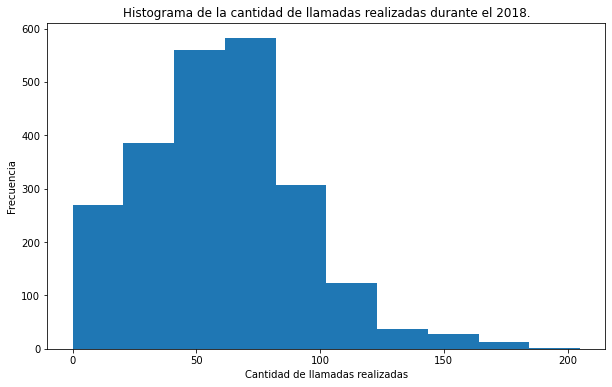

In [33]:
# Contabilizando la cantidad de llamdas realizadas durante el año
df_megaline_rate['total_number_calls'].plot.hist(bins=10,figsize=(10,6))
plt.xlabel('Cantidad de llamadas realizadas')
plt.ylabel('Frecuencia')
plt.title('Histograma de la cantidad de llamadas realizadas durante el 2018.')
plt.show()


Como podemos ver en nuestra histograma, tenemos una mayor concentración de cantidad de llamadas realizadas por los usuarios que va desde las `45` a las `80` aproximadamente mes a mes. Si bien son cantidades considerables de llamadas realizadas por los usuarios, debemos de igual forma determinar cual fue la duración de las mismas para realmente conocer si los usuarios sobrepasan los límites del plan contratado.

Procedermos a realizar el cálculo del `promedio`, `varianza` y `deviación estandar`. 

In [34]:
# Promedio, varianza y desviación estandar por plan
number_calls = df_megaline_rate.pivot_table(index='plan',values='total_number_calls',aggfunc='mean')
number_calls.columns = ['number_call_mean']
surf_var = np.var(df_megaline_rate[df_megaline_rate['plan'] == 'surf']['total_number_calls'])
ulti_var = np.var(df_megaline_rate[df_megaline_rate['plan'] == 'ultimate']['total_number_calls'])
number_calls['number_call_var'] = pd.Series([surf_var,ulti_var], index=['surf','ultimate'])
number_calls['number_call_sd'] = pd.Series([np.sqrt(surf_var),np.sqrt(ulti_var)], index=['surf','ultimate'])
number_calls

,number_call_mean,number_call_var,number_call_sd
plan,,,
surf,59.584547,1034.149122,32.158189
ultimate,60.291436,1117.659540,33.431415


De acuerdo con la tabla anteriormente, podemos observar que tenemos una `varianza` muy alejada del valor promedio, por ende, la `desviación estandar` también es considerable. Esto, en primera estancia, nos indica que tenemos una desperción muy grande entre nuestros datos, para ser precisos, los valores estan muy alejados uno de otro y como prueba, extraeremos los valores mínimos, máximos y la cantidad de datos con la que contamos para la columna `total_number_calls`.

In [35]:
# Calcuando el valor mínimo, máximo y la cantidad de información con la que contamos en nuestra tabla
df_megaline_rate['total_number_calls'].describe()

count    2303.000000
mean       59.806774
std        32.572548
min         0.000000
25%        38.000000
50%        60.000000
75%        79.000000
max       205.000000
Name: total_number_calls, dtype: float64

Como podemos observar, el valor mínimo para `total_number_calls` es de `1`, el máximo es de `205` y contamos con un total de `2258` registros. Recordando la ecuación para el calculo de la varianza, nos indica que debemos calcular la suma de los cuadrados de la diferencia de cada valor que tenemos en la columna y la media, divido entre la cantidad de datos.

### Trabajando con la columna "total_minutes_calls" de la "df_megaline_rate" para los usuarios.

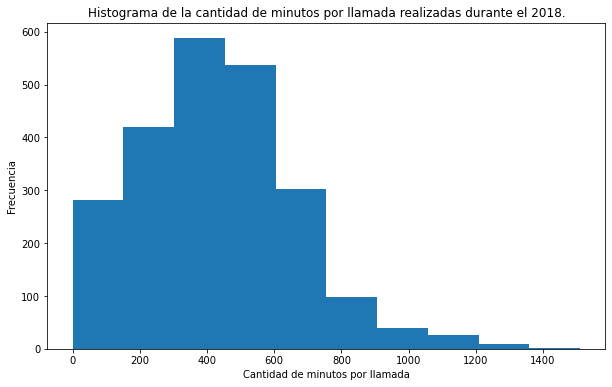

In [36]:
# Contabilizando la cantidad de minutos por llamda realizadas durante el año
df_megaline_rate['total_minutes_calls'].plot.hist(bins=10,figsize=(10,6))
plt.xlabel('Cantidad de minutos por llamada')
plt.ylabel('Frecuencia')
plt.title('Histograma de la cantidad de minutos por llamada realizadas durante el 2018.')
plt.show()


De manera general este histograma nos indica que mayormente las llamdas realizadas durante el `2018` fueron de entre `350` y `450` minutos de duración, el rango que nos proporciona el histograma no sobrepasa los límites del plan `ultimate` sin embargo, queda la incognita si también los usuarios del plan `surf` tienden a respetar dichos límites. 

Continuaremos extrayendo promedios, varianza y desviación estandar para esta columna.

In [37]:
# Promedio, varianza y desviación estandar por plan
minutes_calls = df_megaline_rate.pivot_table(index='plan',values='total_minutes_calls',aggfunc='mean')
minutes_calls.columns = ['minutes_calls_mean']
surf_var = np.var(df_megaline_rate[df_megaline_rate['plan'] == 'surf']['total_minutes_calls'])
ulti_var = np.var(df_megaline_rate[df_megaline_rate['plan'] == 'ultimate']['total_minutes_calls'])
minutes_calls['minutes_call_var'] = pd.Series([surf_var,ulti_var], index=['surf','ultimate'])
minutes_calls['minutes_call_sd'] = pd.Series([np.sqrt(surf_var),np.sqrt(ulti_var)], index=['surf','ultimate'])
minutes_calls

,minutes_calls_mean,minutes_call_var,minutes_call_sd
plan,,,
surf,427.120329,55420.456705,235.415498
ultimate,428.071823,58463.016941,241.791267


Para la columna `total_minutes_calls` tenemos un caso similar, la varianza esta muy alejada de los promedios calculados; encontraremos los valores mínimo, máximo y cantidad de datos.

In [38]:
# Calcuando el valor mínimo, máximo y la cantidad de información con la que contamos en nuestra tabla
df_megaline_rate['total_minutes_calls'].describe()

count    2303.000000
mean      427.419453
std       237.490294
min         0.000000
25%       262.500000
50%       424.000000
75%       571.500000
max      1510.000000
Name: total_minutes_calls, dtype: float64

El valor mínimo que tenemos para la columna `total_minutes_calls` es de `0` lo que implica que hay usuarios que no realizarón llamadas al menos en uno de los meses en los que gozarón del plan, por el otro lado tenemos un valor máximo de `1510` minutos por llamada; al realizar el cálculo de la varianza podemos entender el porque esta es muy alta lo que apunta a valores dispersos.

A continuación verificaremos porque la columna `total_minutes_calls` tiene valores de `0`.

In [39]:
# Validando registros "0" en "total_minutes_calls"
df_megaline_rate[df_megaline_rate['total_minutes_calls'] == 0].head()

,user_id,month,total_number_calls,total_minutes_calls,total_number_sms,total_volume_internet,plan,total
104,1028,2.0,0.0,0.0,12.0,13.0,ultimate,70.0
433,1094,10.0,1.0,0.0,0.0,2.0,surf,20.0
1045,1224,6.0,0.0,0.0,5.0,3.0,ultimate,70.0
1398,1311,6.0,0.0,0.0,0.0,2.0,ultimate,70.0
1645,1361,5.0,0.0,0.0,2.0,2.0,surf,20.0


Podemos observar que esto se debe a que son usuarios que no hicierón uso del servicio de llamadas de manera general, sin embargo, podemos observa que hay registros que si realizarón llamadas telefónicas pero no se contabilizarón minutosy esto podría tener dos razones:
- La llamada fue realizada pero no logro establecerce.
- La llamada fue realizada pero el receptor nunca la contesto.

### Trabajando con la columna "total_number_sms" para la tabla "df_megaline_rate" para los usuarios.

Vamos a ejecutar la misma dinámica para el caso de la columna `total_number_sms` de la tabla `df_megaline_rate` para ambos planes.

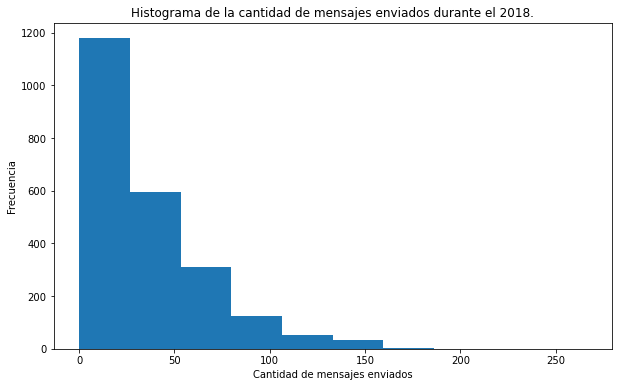

In [40]:
# Contabilizando la cantidad de minutos por llamda realizadas durante el año
df_megaline_rate['total_number_sms'].plot.hist(bins=10,figsize=(10,6))
plt.xlabel('Cantidad de mensajes enviados')
plt.ylabel('Frecuencia')
plt.title('Histograma de la cantidad de mensajes enviados durante el 2018.')
plt.show()

Nuevamente, no se superan los límites para los usarios con el plan `ultimate`, sin embargo para los que tiene contratado el plan `surf` puede que si hayan superado dicho límite. Con mayor frecuencia los usuarios hacen uso de este servicio entre `0` y `25` veces al mes seguido por aquellos que incluso llegan a enviar hasta `50` mensajes y es aquí donde se tiene el límite para el plan `surf`.

Continuaremos con la tabla que contiene `promedio`, `varianza` y `desviación estandar`.

In [41]:
# Promedio, varianza y desviación estandar por plan
number_sms = df_megaline_rate.pivot_table(index='plan',values='total_number_sms',aggfunc='mean')
number_sms.columns = ['number_sms_mean']
surf_var = np.var(df_megaline_rate[df_megaline_rate['plan'] == 'surf']['total_number_sms'])
ulti_var = np.var(df_megaline_rate[df_megaline_rate['plan'] == 'ultimate']['total_number_sms'])
number_sms['number_sms_var'] = pd.Series([surf_var,ulti_var], index=['surf','ultimate'])
number_sms['number_sms_sd'] = pd.Series([np.sqrt(surf_var),np.sqrt(ulti_var)], index=['surf','ultimate'])
number_sms

,number_sms_mean,number_sms_var,number_sms_sd
plan,,,
surf,31.041165,1125.404892,33.547055
ultimate,37.343923,1208.156579,34.758547


Nuevamente en ambos planes, la media de mensajes enviados por los usuarios mes a mes es mínima en comparación con la varianza que sus datos generan, por consiguiente, podemos visualizar que nuestros datos son completamente dispersos y confirmaremos esto nuevamente presentando sus valores máximos, mínimos y cantidad de datos en la columna.

In [42]:
# Calcuando el valor mínimo, máximo y la cantidad de información con la que contamos en nuestra tabla
df_megaline_rate['total_number_sms'].describe()

count    2303.000000
mean       33.022579
std        34.065907
min         0.000000
25%         3.000000
50%        25.000000
75%        51.000000
max       266.000000
Name: total_number_sms, dtype: float64

Nuevamente podemos observar valores en `0` que para este caso en específico es el mínimo de la columna `total_number_sms` y esto muy probablemente se deba a que estos usuarios no hicierón uso del servicio de mensajería al menos un mes a lo largo del año. Por otro lado el valor máximo es de `266` y un total de `2303` registros; pensando nuevamente en la ecuación de la varianza podemos decir que nuestros valores estan dispersos a lo largo de este rango.

### Trabajando con la columna "total_volume_internet" para la tabla "df_megaline_rate" para los usuarios.

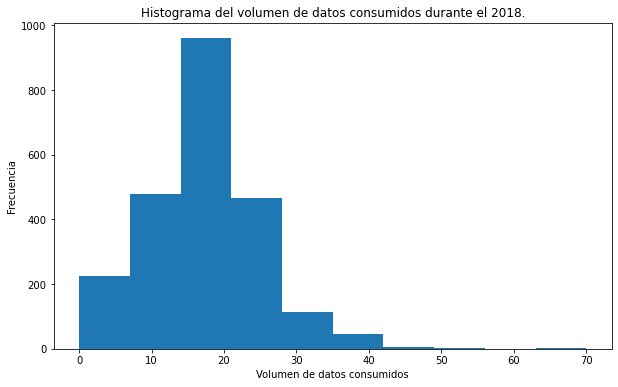

In [43]:
# Contabilizando la cantidad de minutos por llamda realizadas durante el año
df_megaline_rate['total_volume_internet'].plot.hist(bins=10,figsize=(10,6))
plt.xlabel('Volumen de datos consumidos')
plt.ylabel('Frecuencia')
plt.title('Histograma del volumen de datos consumidos durante el 2018.')
plt.show()

Podemos observar de acuerdo al histograma que la mayor concentración de volumen de datos consumido esta alrededor de `20 Gb` mensuales sin embargo en este histograma también podemos darnos cuenta que no importa de que plan se trate, hay consumos que exceden ambos planes siendo el mayor `ultimate` con un límite de `30 Gb` mensuales. Podemos concluir de igual manera que este servicio es el más utilizado por los usuarios y posiblemente también aquel que genera mayor cantidad de ingresos para `Megaline`.

Vamos a construir la tabla que contiene el promedio, varianza y desviación estandar.

In [44]:
# Promedio, varianza y desviación estandar por plan
volume_internet = df_megaline_rate.pivot_table(index='plan',values='total_volume_internet',aggfunc='mean')
volume_internet.columns = ['vol_internet_mean']
surf_var = np.var(df_megaline_rate[df_megaline_rate['plan'] == 'surf']['total_volume_internet'])
ulti_var = np.var(df_megaline_rate[df_megaline_rate['plan'] == 'ultimate']['total_volume_internet'])
volume_internet['vol_internet_var'] = pd.Series([surf_var,ulti_var], index=['surf','ultimate'])
volume_internet['vol_internet_sd'] = pd.Series([np.sqrt(surf_var),np.sqrt(ulti_var)], index=['surf','ultimate'])
volume_internet

,vol_internet_mean,vol_internet_var,vol_internet_sd
plan,,,
surf,16.607346,62.362606,7.897000
ultimate,17.211326,60.069982,7.750483


Por último para la columna `total_volume_internet` de la tabla `df_megaline_rate` podemos encontrar datos con distribuciones un poco menos dispersas en el sentido que nuestra varianza no esta muy por encima de nuestra media general y por ende, nuestra desviación estandar también esta dentro de valores comprensibles.

Profundizaremos un poco en las cifras que se tienen para este caso y sentar mejor las bases de los resultados presentados anteriormente.

In [45]:
# Calcuando el valor mínimo, máximo y la cantidad de información con la que contamos en nuestra tabla
df_megaline_rate['total_volume_internet'].describe()

count    2303.000000
mean       16.797221
std         7.857946
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: total_volume_internet, dtype: float64

In [46]:
# Extrayendo rangos dentro de la columna "total_volume_internet"
df_megaline_rate['total_volume_internet'].sort_values().unique()
print(len(df_megaline_rate['total_volume_internet'].sort_values()))

2303


Podemos observar que la cantidad de datos consumidos va desde los `0 GB` hasta casi `70 GB` por mes de los cuales se tiene un total de `2303` registros. Haciendo la misma analogía que anteriormente se planteo, el mínimo con respecto al máximo varian mucho en cuanto a cantidad, retomando la ecuación de la varianza, si bien no es muy grande la varianza, si esta considerablemente alejada del valor promedio y por ende, se aprecia disperción en los datos.

In [47]:
# Analizando aquellos usuarios que superarón los límites del plan "Surf"
upper_limits_surf = df_megaline_rate[(df_megaline_rate['plan'] == 'surf') & (df_megaline_rate['total'] > 20)]
print(f"Cantidad de usuarios que superarón cualquiera de los límites del plan: {len(upper_limits_surf)}")
print(f"Cantidad de usuarios que superarón el límite de minutos de llamda: {len(upper_limits_surf[upper_limits_surf['total_minutes_calls'] > 500])}")
print(f"Cantidad de usuarios que superarón el límite de SMS: {len(upper_limits_surf[upper_limits_surf['total_number_sms'] > 50])}")
print(f"Cantidad de usuarios que superarón el límite de GB: {len(upper_limits_surf[upper_limits_surf['total_volume_internet'] > 15])}")

Cantidad de usuarios que superarón cualquiera de los límites del plan: 1142
Cantidad de usuarios que superarón el límite de minutos de llamda: 566
Cantidad de usuarios que superarón el límite de SMS: 340
Cantidad de usuarios que superarón el límite de GB: 911


In [48]:
# Analizando aquellos usuarios que superarón los límites del plan "Ultimate"
upper_limits_ultimate = df_megaline_rate[(df_megaline_rate['plan'] == 'ultimate') & (df_megaline_rate['total'] > 70)]
print(f"Cantidad de usuarios que superarón cualquiera de los límites del plan: {len(upper_limits_ultimate)}")
print(f"Cantidad de usuarios que superarón el límite de minutos de llamda: {len(upper_limits_ultimate[upper_limits_ultimate['total_minutes_calls'] > 3000])}")
print(f"Cantidad de usuarios que superarón el límite de SMS: {len(upper_limits_ultimate[upper_limits_ultimate['total_number_sms'] > 1000])}")
print(f"Cantidad de usuarios que superarón el límite de GB: {len(upper_limits_ultimate[upper_limits_ultimate['total_volume_internet'] > 30])}")

Cantidad de usuarios que superarón cualquiera de los límites del plan: 41
Cantidad de usuarios que superarón el límite de minutos de llamda: 0
Cantidad de usuarios que superarón el límite de SMS: 0
Cantidad de usuarios que superarón el límite de GB: 41


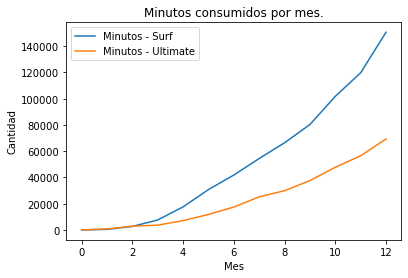

In [49]:
# Graficando el comportamiento los minutos consumidos a lo largo del 2018
df_megaline_rate.groupby(['month',
                          'plan']).agg({'total_minutes_calls':'sum'}).unstack().plot(xlabel='Mes',
                                                                                     ylabel='Cantidad',
                                                                                     title='Minutos consumidos por mes.')
plt.legend(["Minutos - Surf","Minutos - Ultimate"])
plt.show()


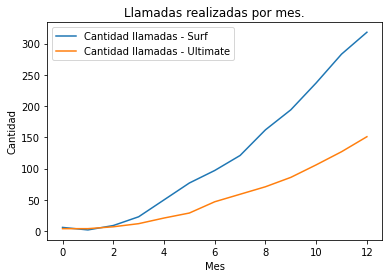

In [50]:
# Graficando el comportamiento de la cantidad de llamadas realizadas a lo largo del 2018
df_megaline_rate.groupby(['month',
                          'plan']).agg({'total_minutes_calls':'count'}).unstack().plot(xlabel='Mes',
                                                                                       ylabel='Cantidad',
                                                                                       title='Llamadas realizadas por mes.')
plt.legend(["Cantidad llamadas - Surf","Cantidad llamadas - Ultimate"])
plt.show()


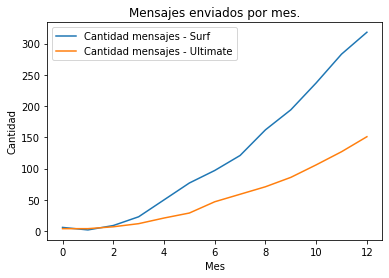

In [51]:
# Graficando el comportamiento los mensajes enviados a lo largo del 2018
df_megaline_rate.groupby(['month',
                          'plan']).agg({'total_number_sms':'count'}).unstack().plot(xlabel='Mes',
                                                                                       ylabel='Cantidad',
                                                                                       title='Mensajes enviados por mes.')
plt.legend(["Cantidad mensajes - Surf","Cantidad mensajes - Ultimate"])
plt.show()


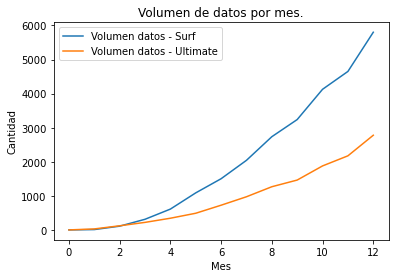

In [52]:
# Graficando el comportamiento del volumen de datos consumido a lo largo del 2018
df_megaline_rate.groupby(['month',
                          'plan']).agg({'total_volume_internet':'sum'}).unstack().plot(xlabel='Mes',
                                                                                     ylabel='Cantidad',
                                                                                     title='Volumen de datos por mes.')
plt.legend(["Volumen datos - Surf","Volumen datos - Ultimate"])
plt.show()


## Prueba de hipótesis

La primer hipótesis que tenemos hasta el momento es que el plan `Surf` genera más ingreso para `Megaline` que el plan `Ultimate` esto es debido a que aparentemente los usuarios al contar con menos cantidad de minutos, SMS y datos, tienden a superarlos con facilidad provocando que el usuario tenga que pagar esa diferencia.

Por esta razón procederemos a ejecutar la prueba de hipótesis para validar lo anterior mencionado.

### La cantidad de llamadas realizadas durante el año del plan `Surf` es igual las realizadas en el plan `Ultimate`.

Para esta prueba de hipótesis es importante identificar cuál es la adecuada. Tenemos 4 opciones para poder trabajar y debemos conocer que es lo que esta pasando con nuestras pruebas y saber con que datos contamos:
- `Hipótesis con dos colas`: Requerímos de un valor específico de comparación con la media de la muestra.
- `Hipótesis con una cola`: Requerimos un valor específico de comparación con la media de la muestar, en este caso nuestro `p value` se dividirá entre 2 para considerar ambas posiciones.
- `Hipótesis sobre la igualdad de las medias de dos poblaciones`: Requerimos de dos muestras y si se sabe conoce la varianza de ambas muestras y estas son iguales puede ajustarse el parámetro `equal_var = True`, en caso contrario se coloca en `False`.
- `Hipótesis sobre la igualdad de las medias de muestras emparejadas`:  Requereimos de dos muestras con la característica de que estas provienen del mismo set de datos con una diferencia temporal.

De acuerdo con los parámetros que requiere cada una de las pruebas y por la prueba de hipótesis planteada, podemos concluir en usar `igualdad de las medias de dos poblaciones` por lo siguiente:
- Vamos a compara dos muestras que aunque provienden del mismo set de datos, estas son independientes una de otra puesto que vamos a comparar la cantidad de llamdas realizadas por los usuarios con el plan `surf` contra las realizadas por los `ultimate`.
- Estas muestras no varian conforme el tiempo (para este caso en específico) puesto que vamos a hacer la evaluación del año completo.
- No contamos con un parámetro en específico con el que queramos trabajar para compara con la media de la muestra.

En conclusión, trabajaremos para estos fines con `Hipótesis sobre la igualdad de las medias de dos poblaciones`.

In [53]:
# Identificando la cantidad de muestras suficientes para nuestra muestra aleatoria
surf_set = df_megaline_rate[df_megaline_rate['plan'] == 'surf'].reset_index(drop=True)
surf_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                1579 non-null   int64  
 1   month                  1579 non-null   float64
 2   total_number_calls     1579 non-null   float64
 3   total_minutes_calls    1579 non-null   float64
 4   total_number_sms       1579 non-null   float64
 5   total_volume_internet  1579 non-null   float64
 6   plan                   1579 non-null   object 
 7   total                  1579 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 98.8+ KB


In [54]:
ultimate_set = df_megaline_rate[df_megaline_rate['plan'] == 'ultimate'].reset_index(drop=True)
ultimate_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                724 non-null    int64  
 1   month                  724 non-null    float64
 2   total_number_calls     724 non-null    float64
 3   total_minutes_calls    724 non-null    float64
 4   total_number_sms       724 non-null    float64
 5   total_volume_internet  724 non-null    float64
 6   plan                   724 non-null    object 
 7   total                  724 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 45.4+ KB


Ajustaremos el valor α = 5% que es un valor convencional de significación estadística y ejecutaremos la prueba de `hipótesis sobre la igualdad de medias de dos poblaciones`.

Para poder ejecutar la prueba de hipótesis, es importante primero determinar si las muestras tienen varianzas iguales o similares mayormente, para esto, pondremos a prueba dichas muestras usando el algoritmo de `Levene` que se encarga de probar que todas las entradas de la hipótesis nula tienen varianzas iguales.

In [55]:
# Ejecutando la prueba de "Levene"
alpha = 0.05
stat,p = levene(surf_set['total_number_calls'],ultimate_set['total_number_calls'])
print("P value:", p)
if p < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

P value: 0.3291756585860618
No rechazamos la hipótesis nula


De acuerdo con `p value` de la `prueba de levene` nos indica que `no se rechaza la hipótesis nula`, por ende `equal_var = True`.

In [56]:
# Ejecutando prueba de hipótesis Núm. 1
alpha = 0.05
results = st.ttest_ind(surf_set['total_number_calls'],ultimate_set['total_number_calls'],equal_var = True)
print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  0.6288308023160908
No rechazamos la hipótesis nula


De esta prueba de hipótesis podemos ver que nuestro `valor p` sale del rango de significación estadística, por lo que `No rechazamos la hipótesis nula`, es decir, hay un `62.8%` al menos de probabilidad de obtener aleatoriamente muestras similares de los dos conjuntos de datos.

Ahora veremos que es lo que sucede cuando hablamos de la cantidad de mensajes enviados postulando Ho como `La cantidad de mensajes enviados por los usuarios con el plan surf es igual a los enviados con el plan ultimate`.

### La cantidad de mensajes enviados por los usuarios con el plan surf es igual a los enviados con el plan ultimate.

In [57]:
# Ejecutando la prueba de "Levene"
stat,p = levene(surf_set['total_number_sms'],ultimate_set['total_number_sms'])
print("P value:", p)
if p < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

P value: 0.0030964819211228597
Rechazamos la hipótesis nula


Para este caso, la `prueba de levene` nos indica que `rechazamos la hipótesis nula` por ende, consideramos que tenemos la evidencia suficiente como para rechazar que las varianzas son iguales y como consecuencia `equal_var=False`

In [58]:
# Ejecutando prueba de hipótesis Núm. 2
alpha = 0.05
results = st.ttest_ind(surf_set['total_number_sms'],ultimate_set['total_number_sms'],equal_var=False)
print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  4.728131867996157e-05
Rechazamos la hipótesis nula


`La hipótesis nula es rechazada` pues hay una probabilidad muy escasa de que de manera aleatoria, encontremos valores similares al tomar una muestra de cada conjunto de usuarios con el plan `ultimate` y con el plan `surf`.

### La cantidad de datos consumidos por los usuarios con el plan surf es igual a los enviados con el plan ultimate.

In [59]:
# Ejecutando la prueba de "Levene"
stat,p = levene(surf_set['total_volume_internet'],ultimate_set['total_volume_internet'])
print("P value:", p)
if p < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

P value: 0.5962065161438024
No rechazamos la hipótesis nula


De acuerdo con `p value` de la `prueba de levene` nos indica que `no se rechaza la hipótesis nula`, por ende `equal_var = True`.

In [60]:
# Ejecutando prueba de hipótesis Núm. 3
alpha = 0.05
results = st.ttest_ind(surf_set['total_volume_internet'],ultimate_set['total_volume_internet'],equal_var=True)
print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  0.0868097375771433
No rechazamos la hipótesis nula


Para esta hipótesis, `no fue rechazada` pues hay una probabilidad de al menos `8.6%` de que de manera aleatoria al tomar una muestra de cada conjunto, esta sea similar una de otra.

### El ingreso promedio de los usuarios de las tarifas `Ultimate` y `Surf` difiere.

Para formular nuestra hipótesis nula, debemos tomar en cuenta lo establecido matematicamente y esto asume una igualdad, es decir, que los ingresos que genera el plan `Ultimate` tiene un `95%` al menos de confiabilidad que seran similares a los ingresos que genera el plan `Surf`.

Se establece por simplicidad un valor para `α = 5%`, esto es debido a que podriamos tener cierta permisibilidad de error.

Por ende, nuestra hipótesis alternativa plantea el rechazo de dicha igualdad, proponiendo que hay evidencia suficiente como para decir que hay una diferencia significativa entre los ingresos generados por un plan y el otro.

Por otro lado, se hace uso de `Hipótesis sobre la igualdad de las medias de dos poblaciones` por el hecho de que si bien los datos provienden del mismo conjunto, estos son independientes uno de otro por la sencilla razón de que cuentan en su totalidad con parámtros para características totalmente diferentes.

In [61]:
# Ejecutando la prueba de "Levene"
stat,p = levene(surf_set['total'],ultimate_set['total'])
print("P value:", p)
if p < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

P value: 3.070976609395645e-83
Rechazamos la hipótesis nula


De acuerdo con `p value`, la hipótesis es rechazada puesto que hay evidencia suficiente como para inferir que las varianzas entre los conjuntos de datos son distintas, por ende `equal_var=False`.

In [62]:
# Ejecutando prueba de hipótesis Núm. 4
alpha = 0.05
results = st.ttest_ind(surf_set['total'],ultimate_set['total'],equal_var=False)
print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  1.2184115852123163e-15
Rechazamos la hipótesis nula


Podemos observar que nuestro `p-value` salió por completo de nuestro nivel de confianza lo que nos indica que tenemos la evidencia suficiente como para rechazar nuestra hipótesis y asumir que hay una diferencia significativa si tomamos al azar una muestra de cada conjunto y las comparamos. Por lo que podemos decir que hay un plan tarifario que genera más ingresos para `Megaline` que otro.

### El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.

Para esta hipótesis aplican los mismos criterios que en la anterior, por ende, usaremos `Hipótesis sobre la igualdad de las medias de dos poblaciones`.

Nuestra hipótesis nula estará sostenida por el hecho que los usuarios de `Nueva York-Nueva Jersey` generan ingresos similares con respecto a los usuarios de otras regiones. Por ende, nuestra hipotesis alternativa plantea que los ingresos son diferentes.

Primero, debemos crear una muestra con los datos de aquellos usuarios que viven en `Nueva York-Nueva Jersey` y compararlos con el resto excluyendo a estos usarios.

In [63]:
# Normalizando la columna "city" de "df_megaline_users"
def lower_city(row):
    city = row['city']
    return city.lower()

df_megaline_users['city'] = df_megaline_users.apply(lower_city,axis=1)
df_megaline_users.tail()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
495,1495,Fidel,Sharpe,67,"new york-newark-jersey city, ny-nj-pa msa",2018-09-04,surf,NaT
496,1496,Ariel,Shepherd,49,"new orleans-metairie, la msa",2018-02-20,surf,NaT
497,1497,Donte,Barrera,49,"los angeles-long beach-anaheim, ca msa",2018-12-10,ultimate,NaT
498,1498,Scot,Williamson,51,"new york-newark-jersey city, ny-nj-pa msa",2018-02-04,surf,NaT
499,1499,Shena,Dickson,37,"orlando-kissimmee-sanford, fl msa",2018-05-06,surf,NaT


In [64]:
# Creado "new_york_jersey" que contiene los usuarios de "Nueva York-Nueva Jersey"
def new_york_jersey(row):
    city = row['city']
    if city.find('new york-newark-jersey') != -1:
        return row['user_id']

new_york_jersey = df_megaline_users.apply(new_york_jersey,axis=1)
new_york_jersey.dropna(inplace=True)
new_york_jersey = df_megaline_rate.loc[list(new_york_jersey),:]

In [65]:
# Creado "rest_regions" que no contiene los usuarios de "Nueva York-Nueva Jersey"
def rest_regions(row):
    city = row['city']
    if city.find('new york-newark-jersey') == -1:
        return row['user_id']

rest_regions = df_megaline_users.apply(rest_regions,axis=1)
rest_regions.dropna(inplace=True)
rest_regions = df_megaline_rate.loc[list(rest_regions),:]

In [66]:
# Ejecutando la prueba de "Levene"
stat,p = levene(new_york_jersey['total'],rest_regions['total'])
print("P value:", p)
if p < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

P value: 0.1092196269968889
No rechazamos la hipótesis nula


Al `no rechazar la hipótesis nula` se verifica que no hay evidencia suficiente como para demostrar lo contrario, por ende, el valor `equal_var=True`.

In [67]:
# Ejecutando prueba de hipótesis Núm. 5
alpha = 0.05
results = st.ttest_ind(new_york_jersey['total'],rest_regions['total'],equal_var=True)
print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  0.09206772626978282
No rechazamos la hipótesis nula


Este resultado nos indica que no tenemos evidencia suficiente como para sostener que los usuarios de la región de `Nueva York-Nueva Jersey` generan ingresos diferentes que los del resto de regiones, dando paso a que, si seleccionamos una muestra de cada conjunto al azar, hay al menos un `9.2%` de probabilidades de encontrarnos con que hay similitudes entre las muestras.

## Conclusiones

De manera general nos econtramos con muchos retos alrededor de este proyecto, primeramente el conjuntar la información de un dataset que la contuviera y el como partir de ello para los distintos análisis fue laborioso pues fue aquí donde se puso a prueba el entendimiento de la teoría.

En la realización de este proyecto me encontre con variazas sumamente lejanas al promedio de los registros, esto no me permitio tener una visión clara de la información que contenía en mi conjunto de datos (el vaciado de información de los distintos archivos que nos proporcionaron), lo cuál me llevo a analizar a profundidad que era lo que estaba pasando.

Las varianzas sumamentes grandes me llevarón a descubrir que los datos se encontraban totalmente dispersos en un rango demasiado grande, es decir, tenía valores practicamente en el orden de las decenas, despersos en un rango en el orden de los miles, ademas también, la cantidad de datos era mínima en comparación con este mismo rango.

Posteriormente esto nos llevo de la mano hasta llegar a investigar cuantos usuarios de manera general y particular superarón los límites de su plan llegando a concluir, si bien, los usuarios del plan `surf` son mas que los usuarios de plan `ultimate`, son pocos de este último los que rebasan estos límites en comparación con el `surf`. Esto de manera lógica, tiene sentido pues los límites del plan `surf` son considerablemente menores que el `ultimate`.

Debido a lo anterior, era importante ratificar esta información a través de pruebas de hipótesis planteando 5 principalmente:
- La cantidad de llamadas realizadas durante el año del plan Surf es igual las realizadas en el plan Ultimate.
- La cantidad de mensajes enviados por los usuarios con el plan surf es igual a los enviados con el plan ultimate.
- La cantidad de datos consumidos por los usuarios con el plan surf es igual a los enviados con el plan ultimate.
- El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.
- El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.

Concluyendo que, hay evidencia suficiente como para identificar que uno de los planes genera mayores ingresos para la compañia `Megaline` y este es el plan `Surf` y con respecto a la hipótesis de ingresos generados en la región de `Nueva York-Nueva Jersey` y el resto de regiones, vemos que no hay evidencia suficiente como para pensar que hay alguna diferencia en lo reportado.